### Heart Disease Prediction with Decision Tree

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel("heart_disease.xlsx",sheet_name=1)
print("Shape of dataset:",df.shape)

Shape of dataset: (908, 13)


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
df.thal.unique()

array(['fixed defect', 'normal', 'reversable defect'], dtype=object)

In [5]:
df.cp.unique()

array(['typical angina', 'atypical angina', 'asymptomatic', 'non-anginal'],
      dtype=object)

In [6]:
df.slope.unique()

array(['downsloping', 'flat', 'upsloping'], dtype=object)

In [7]:
print(df.info())
print("-------------")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None
-------------
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.8912

In [8]:
print(df.isna().sum())

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


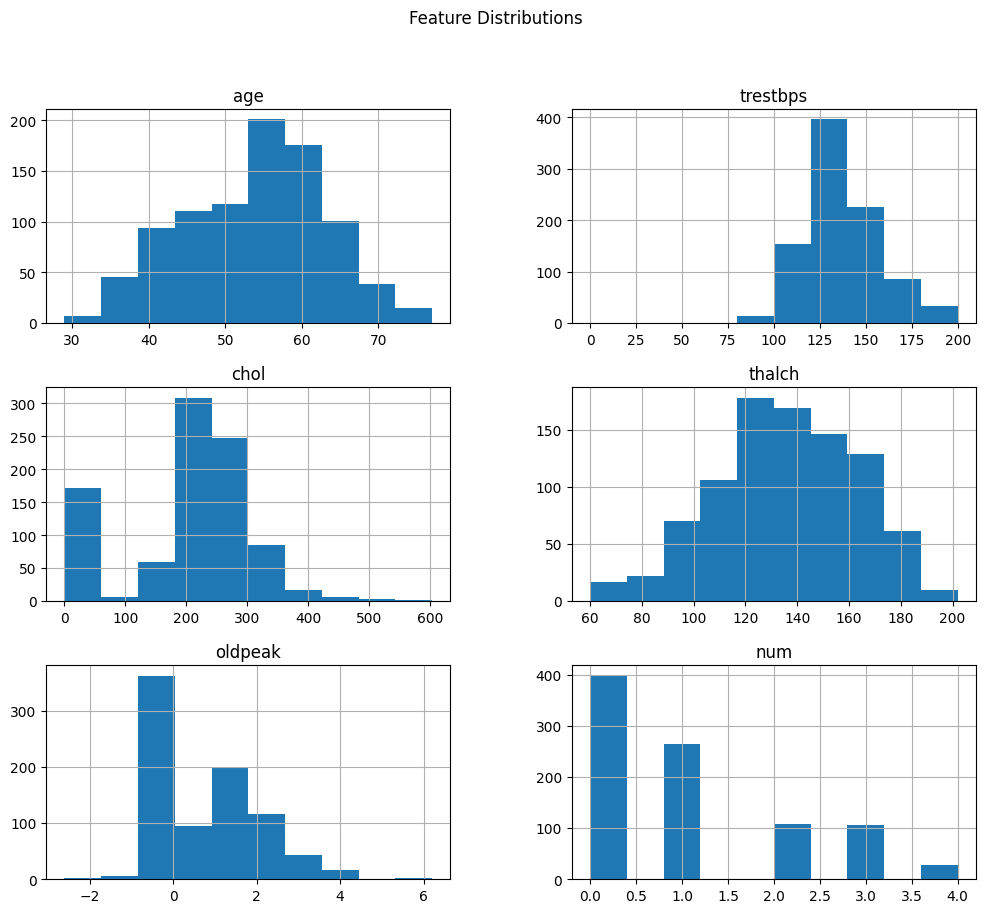

In [9]:
#Histograms
df.hist(figsize=(12,10))
plt.suptitle("Feature Distributions")
plt.show()

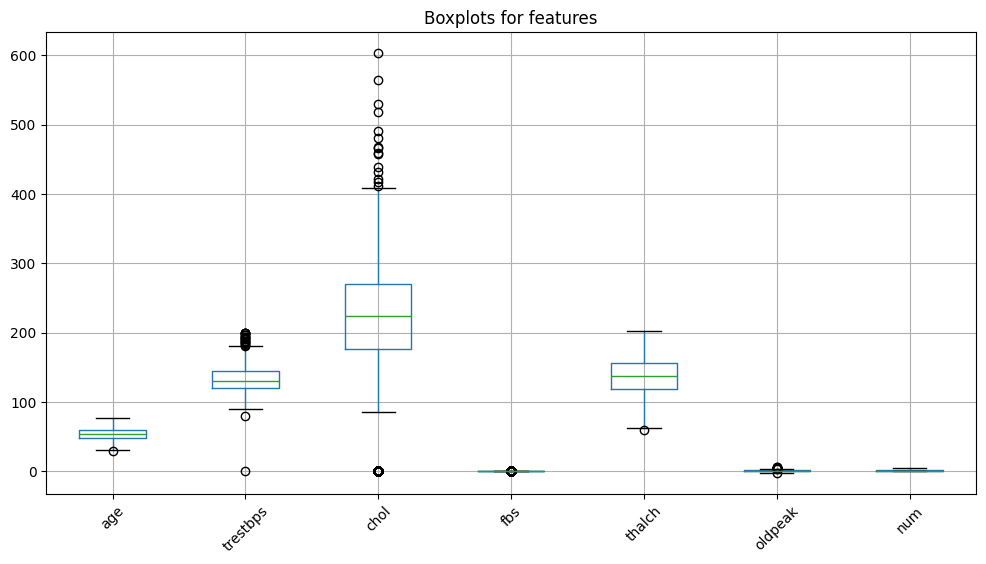

In [10]:
#Boxplots for outliers
plt.figure(figsize=(12,6))
df.boxplot()
plt.title("Boxplots for features")
plt.xticks(rotation=45)
plt.show()

In [11]:
df.corr(numeric_only=True)

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


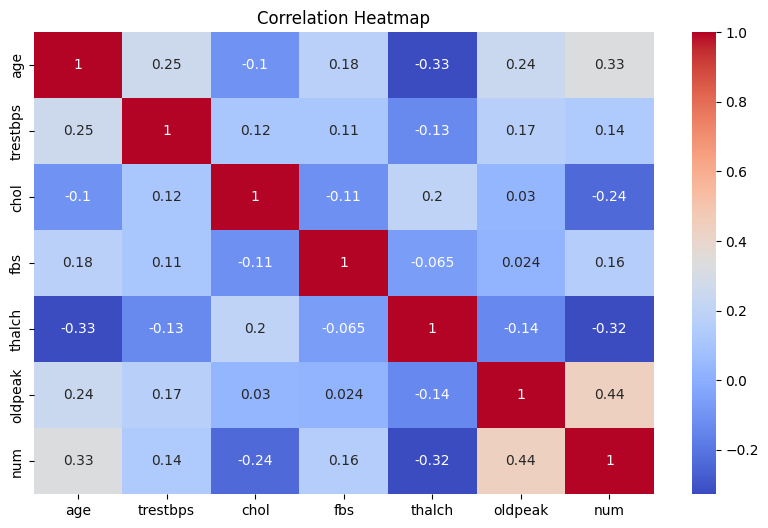

In [12]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),cmap="coolwarm",annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [13]:
#Feature Engineering
#Fill missing numeric values with mean
df=df.fillna(df.mean(numeric_only=True))

In [14]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [15]:
#Separate features and target
y=df["num"]                # target

In [ ]:
#Binary encoding (True/False or Male/Female)
df['sex']=df['sex'].map({'Male':1,'Female':0})
df['fbs']=df['fbs'].map({True:1,False:0})
df['exang']=df['exang'].map({True:1,False:0})

#One-Hot Encoding for multi-category categorical features
categorical_cols=['cp','restecg','slope','thal']
df=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [17]:
df=df.fillna(df.median(numeric_only=True))

In [18]:
#Separate features and target
X=df.drop("num",axis=1)
X.isna().sum()

age                         0
sex                         0
trestbps                    0
chol                        0
fbs                         0
thalch                      0
exang                       0
oldpeak                     0
cp_atypical angina          0
cp_non-anginal              0
cp_typical angina           0
restecg_normal              0
restecg_st-t abnormality    0
slope_flat                  0
slope_upsloping             0
thal_normal                 0
thal_reversable defect      0
dtype: int64

In [19]:
print("Shape of X:",X.shape)
print("Shape of y:",y.shape)
print("Target class distribution:\n",y.value_counts())
print("Final feature columns:",X.columns.tolist())

Shape of X: (908, 17)
Shape of y: (908,)
Target class distribution:
 num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64
Final feature columns: ['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']


In [20]:
#Decision Tree Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Train-test split (80-20)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

# Initialize Decision Tree model
dt=DecisionTreeClassifier(random_state=42)

In [21]:
#Train the model
dt.fit(X_train,y_train)

#Predictions
y_pred=dt.predict(X_test)

In [22]:
#Evaluation metrics
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision (macro):",precision_score(y_test,y_pred,average='macro'))
print("Recall (macro):",recall_score(y_test,y_pred,average='macro'))
print("F1-score (macro):",f1_score(y_test,y_pred,average='macro'))

#ROC-AUC (One-vs-Rest for multi-class)
print("ROC-AUC (ovr, macro):",roc_auc_score(y_test,dt.predict_proba(X_test),multi_class='ovr',average='macro'))

#Detailed classification report
print("Classification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.45604395604395603
Precision (macro): 0.29443179471610587
Recall (macro): 0.28509331863105447
F1-score (macro): 0.2893001225647492
ROC-AUC (ovr, macro): 0.5695746594805717
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.66      0.69        80
           1       0.43      0.43      0.43        53
           2       0.07      0.09      0.08        22
           3       0.24      0.24      0.24        21
           4       0.00      0.00      0.00         6

    accuracy                           0.46       182
   macro avg       0.29      0.29      0.29       182
weighted avg       0.48      0.46      0.47       182



In [23]:
#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Define parameter grid
param_grid={
    "max_depth":[3,5,7,None],
    "min_samples_split":[2,5,10],
    "criterion":["gini","entropy"]
}

grid_search=GridSearchCV(
    estimator=dt,        # reusing dt
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

#Fit on training data
grid_search.fit(X_train,y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [24]:
#Best parameters
print("Best Parameters:",grid_search.best_params_)
print("Best Cross-validation Accuracy:",grid_search.best_score_)

#Use best model for predictions
best_dt=grid_search.best_estimator_
y_pred_best=best_dt.predict(X_test)

Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}
Best Cross-validation Accuracy: 0.5715635333018423


In [25]:
#Evaluate
print("Tuned Model Accuracy:",accuracy_score(y_test,y_pred_best))
print("Tuned Model Precision (macro):",precision_score(y_test,y_pred_best,average='macro'))
print("Tuned Model Recall (macro):",recall_score(y_test,y_pred_best,average='macro'))
print("Tuned Model F1-score (macro):",f1_score(y_test,y_pred_best,average='macro'))

Tuned Model Accuracy: 0.4945054945054945
Tuned Model Precision (macro): 0.41805594405594404
Tuned Model Recall (macro): 0.26536000163358653
Tuned Model F1-score (macro): 0.2531818181818182


c:\Users\Srees_lappy\Desktop\dscodes\EXCELR\venvex\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


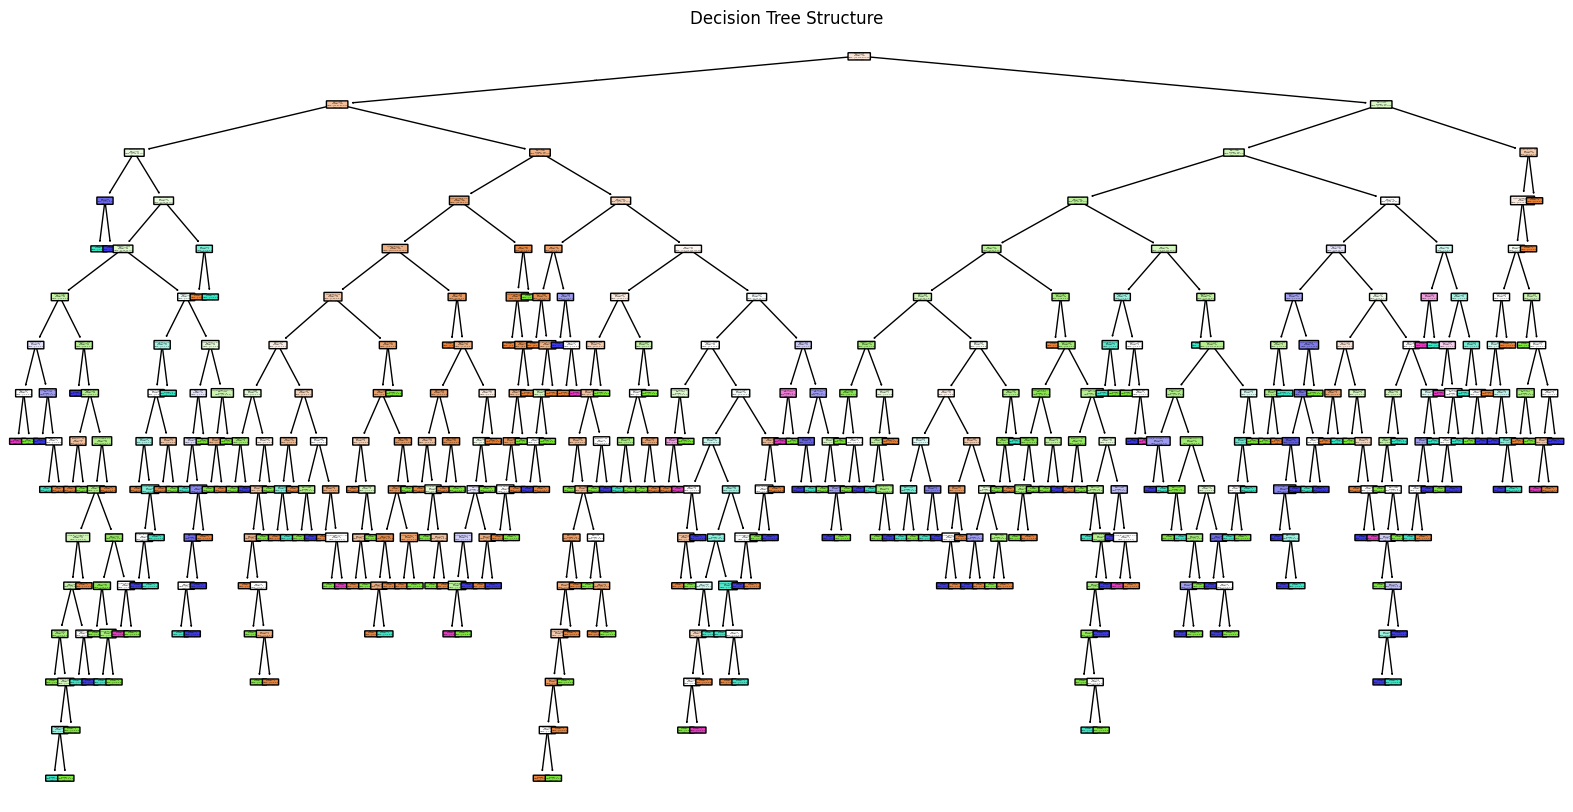

In [26]:
#Model Evaluation and Analysis

#Import necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

#Visualizing the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt,feature_names=X.columns,class_names=True,filled=True,rounded=True)
plt.title("Decision Tree Structure")
plt.show()

In [ ]:
#Feature Importance
importances=dt.feature_importances_
feature_importance_df=pd.DataFrame({'Feature': X.columns,'Importance':importances}).sort_values(by='Importance',ascending=False)
print("Feature Importance:\n",feature_importance_df)


Feature Importance:
                      Feature  Importance
3                       chol    0.156093
5                     thalch    0.154232
0                        age    0.149337
7                    oldpeak    0.136525
2                   trestbps    0.114759
6                      exang    0.090877
9             cp_non-anginal    0.033564
15               thal_normal    0.030259
11            restecg_normal    0.026891
16    thal_reversable defect    0.020745
8         cp_atypical angina    0.020698
1                        sex    0.017573
13                slope_flat    0.016133
4                        fbs    0.015487
14           slope_upsloping    0.007997
12  restecg_st-t abnormality    0.007283
10         cp_typical angina    0.001547


### Interview Questions:

### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

- **max_depth**: Maximum depth of the tree.  
  - Controls how "deep" the tree grows.  
  - Too large means overfitting, too small means underfitting.  

- **min_samples_split**: Minimum number of samples required to split a node.  
  - Higher value indicates fewer splits, simpler tree (less overfitting).  
  - Lower value indicates more splits, complex tree (risk of overfitting).  

- **min_samples_leaf**: Minimum samples required in a leaf node.  
  - Ensures leaves are not too small.  
  - Larger value -> smoother model, less variance.  

- **max_features**: Number of features to consider when splitting.  
  - Helps reduce variance and overfitting.  

- **criterion**: Function to measure quality of a split (example: gini, entropy).  
  - Affects how the tree decides the best split.  

* Tuning these hyperparameters helps balance bias vs variance (underfitting vs overfitting).  

---

### 2. What is the difference between Label Encoding and One-hot Encoding?

- **Label Encoding**:  
  - Converts categories into numbers (e.g.,Red=0,Blue=1,Green=2).  
  - Problem: Adds an artificial order/priority between categories.  
  - Good for: Ordinal data (e.g.,Small < Medium < Large).  

- **One-hot Encoding**:  
  - Creates separate binary columns for each category (e.g.,Red=[1,0,0],Blue=[0,1,0],Green=[0,0,1]).  
  - No artificial order between categories.  
  - Problem: Can create many columns if categories are large (high dimensionality).  
  - Good for: Nominal data (e.g.,colors,city names).  

* Difference in short:  
- Label encoding = single column,assigns numbers.  
- One-hot encoding = multiple columns,assigns 0/1 flags.  
